In [2]:
%reload_ext autoreload
%autoreload 2
import os, sys
os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"
os.environ["CUDA_VISIBLE_DEVICES"]="6"  # specify which GPU(s) to be used
import torch
import torch.nn as nn
import numpy as np
from tqdm import tqdm_notebook as tqdm
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import seaborn as sns
import pandas as pd
import time
import matplotlib.pyplot as plt

In [3]:
def plot_relative_distribution(df, feature, hue, title='', size=2):
    f, ax = plt.subplots(1,1, figsize=(4*size,3*size))
    total = float(len(df))
    sns.countplot(x=feature, hue=hue, data=df, palette='Set2')
    plt.title(title)
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x()+p.get_width()/2.,
                height,
                '{:1.2f}%'.format(100*height/total),
                ha="center") 
    plt.show()

In [4]:
fold = 0
mode = "curriculum_easy_60idx"
df = pd.read_csv(f"./Train_Data_{mode}_{fold}.csv")
df.head()

,image_id,data_provider,isup_grade,gleason_score,tile_number,split,tile_pixel,tile_blueratio,image_idx,k_means_grp,curicullum_cluster_grp
0,9716b5d2e13a28be3dc836134153720c,radboud,4,4+4,7,1.0,"121,109,111,86,81,79,77,","48,40,46,33,32,33,28,",0,3,1
1,0954f0bb123cf3be8b00c9c989dcf3d6,karolinska,0,0+0,43,1.0,"152,141,135,134,127,128,128,123,126,122,117,11...","47,41,43,40,45,44,39,43,45,43,48,42,40,33,41,3...",1,0,0
2,d861180850ca54282b38c782734a7dc7,karolinska,0,0+0,39,0.0,"89,82,72,67,70,69,69,60,61,69,68,69,58,57,60,6...","32,30,29,29,25,27,26,26,26,25,25,25,26,25,26,2...",2,10,1
3,459154b1334d073cfef8af95362a7051,karolinska,0,0+0,34,1.0,"112,103,102,99,92,89,97,90,94,88,83,83,82,79,7...","42,34,40,33,37,31,38,31,33,33,29,30,33,31,30,2...",3,11,0
4,27489a7f1972687cccb1258116ff7f10,karolinska,0,0+0,24,0.0,"105,101,101,92,87,85,84,89,86,83,81,77,73,80,7...","34,35,37,35,32,31,32,29,31,29,31,28,28,29,27,2...",4,11,0


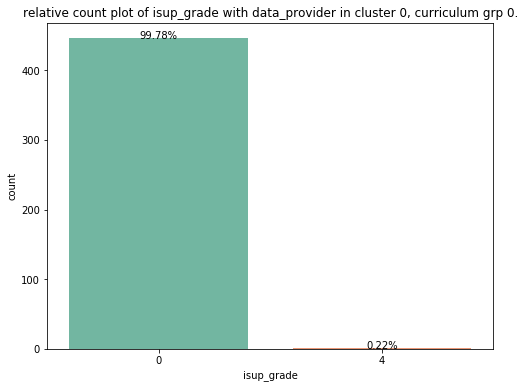

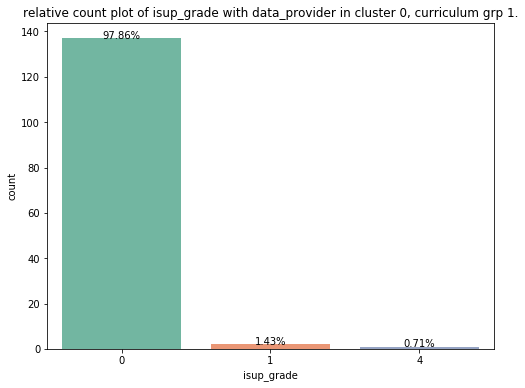

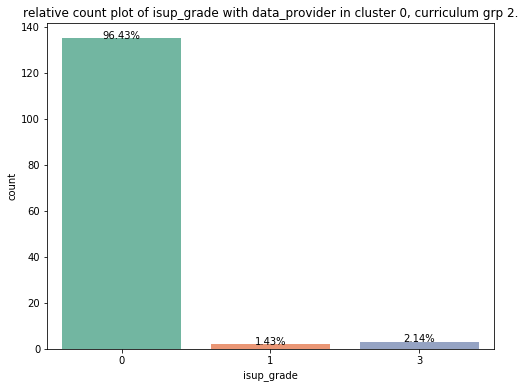

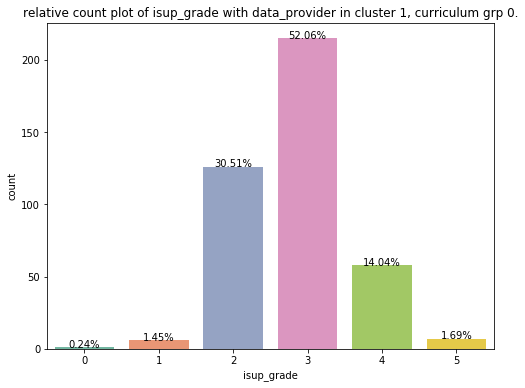

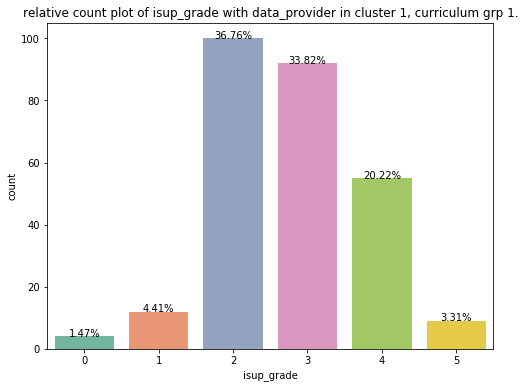

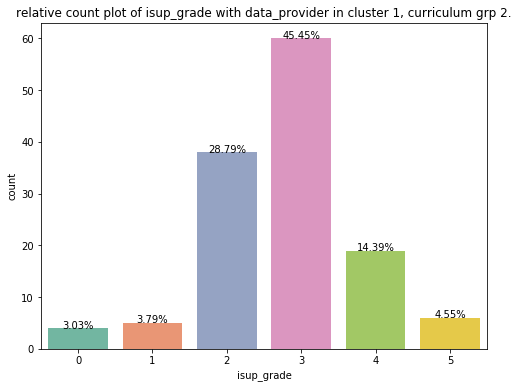

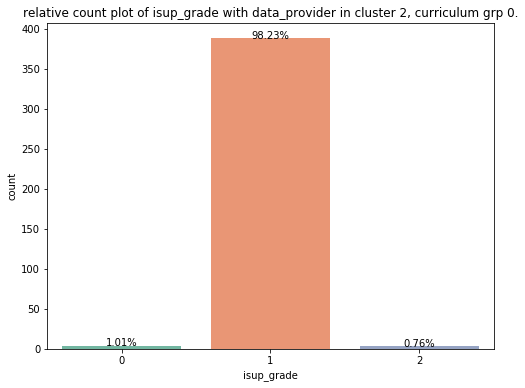

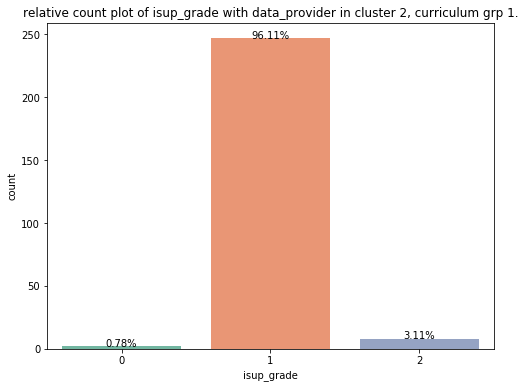

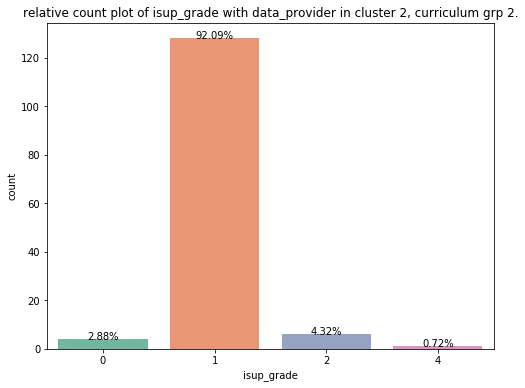

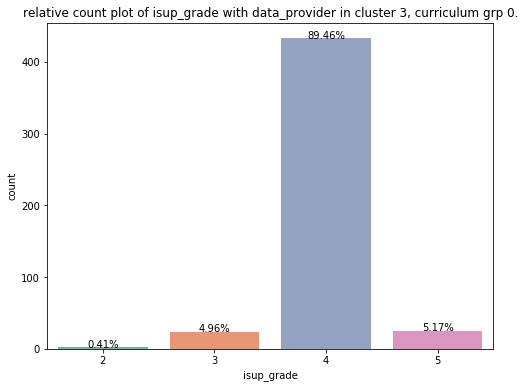

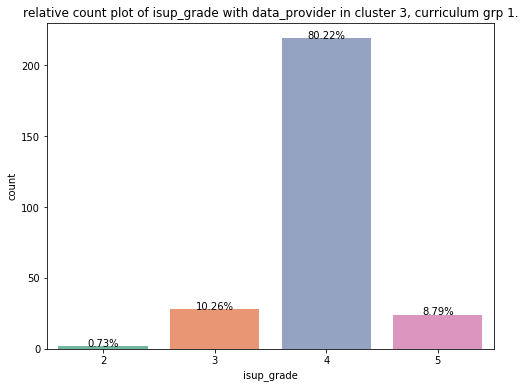

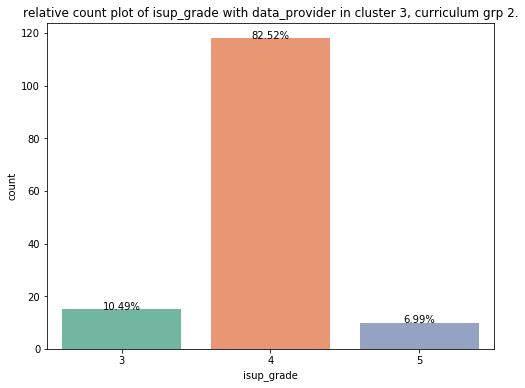

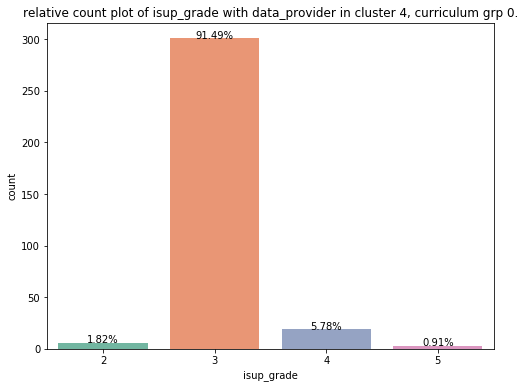

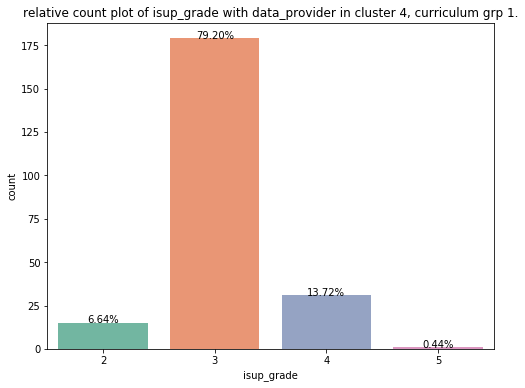

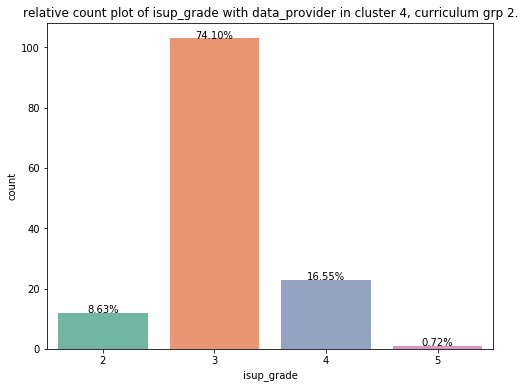

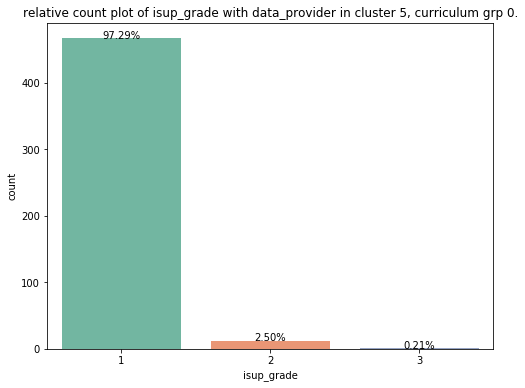

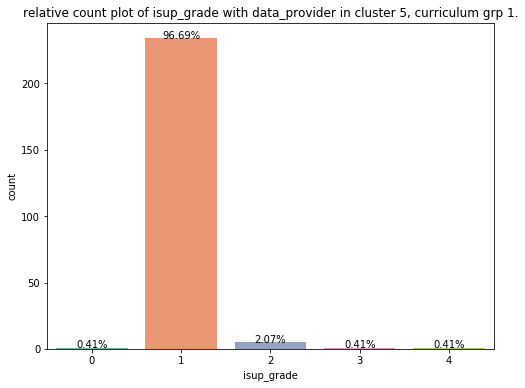

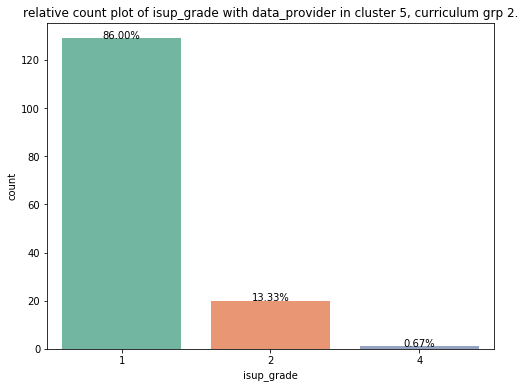

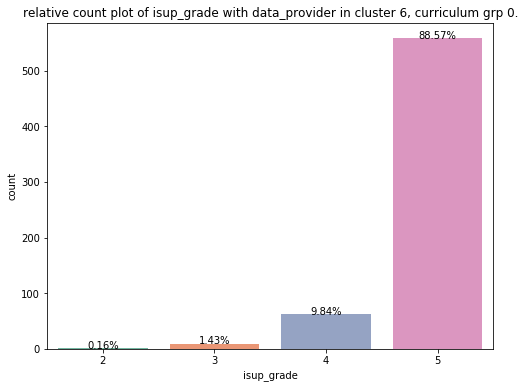

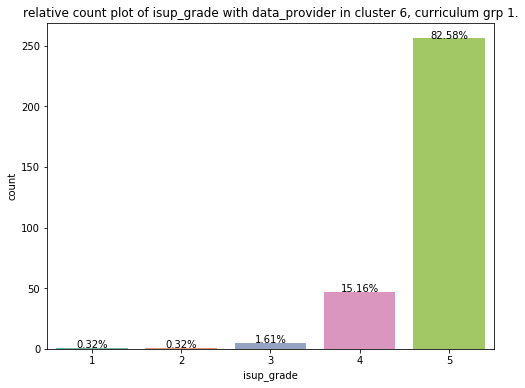

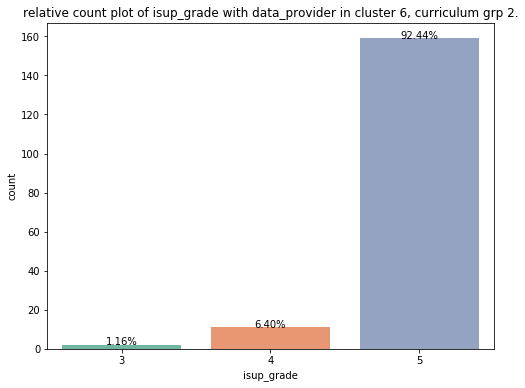

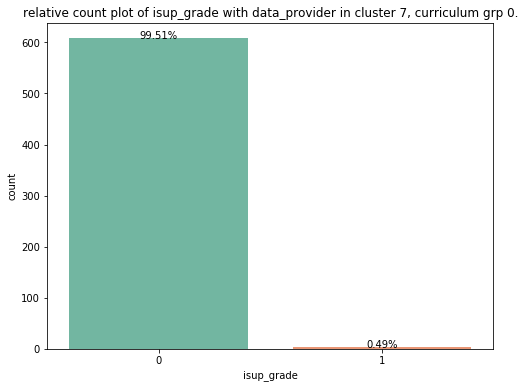

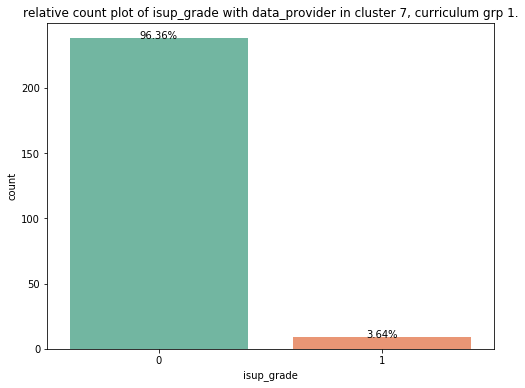

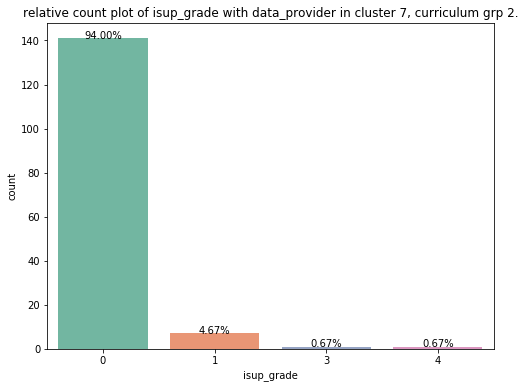

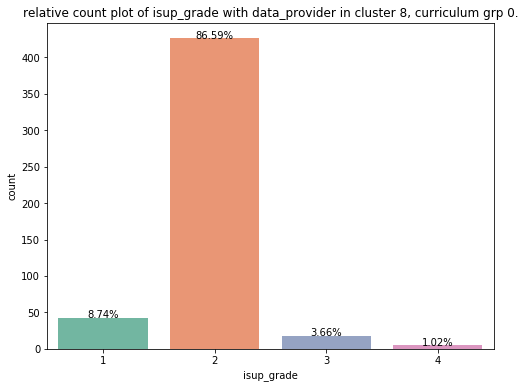

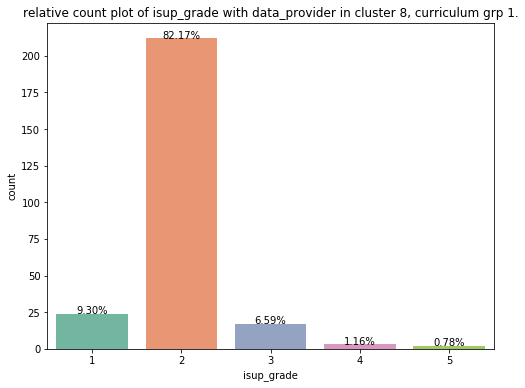

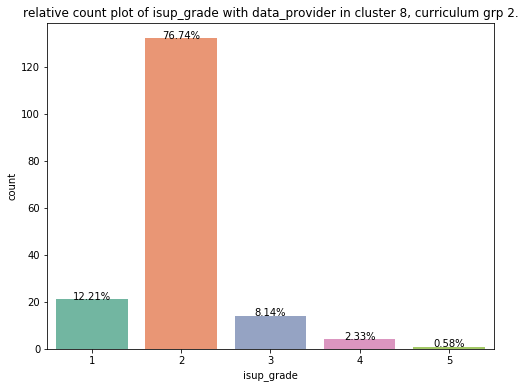

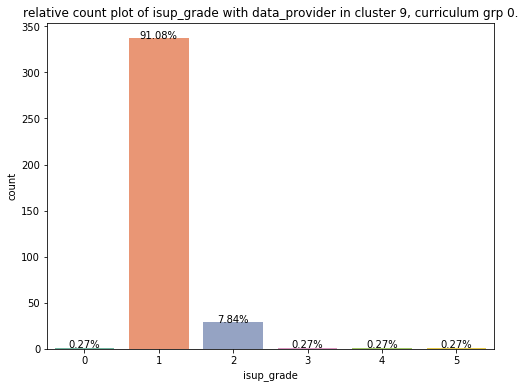

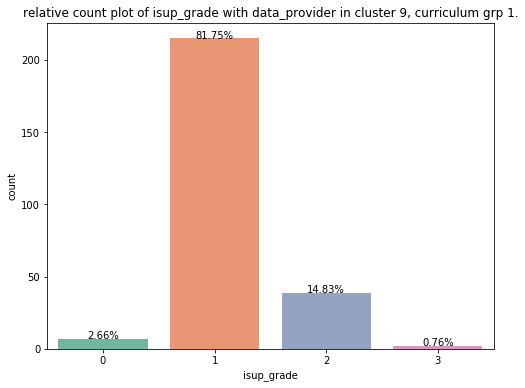

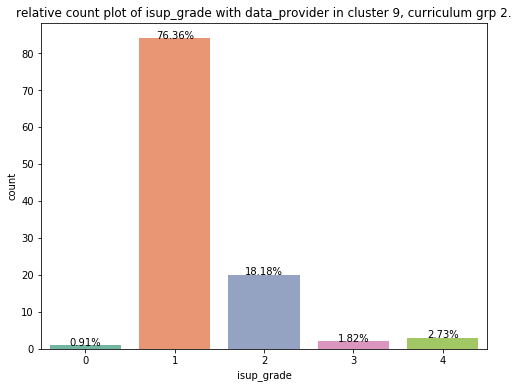

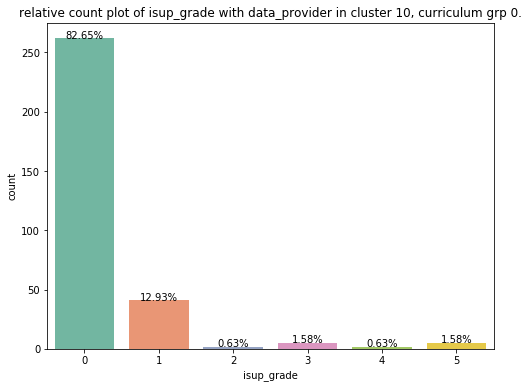

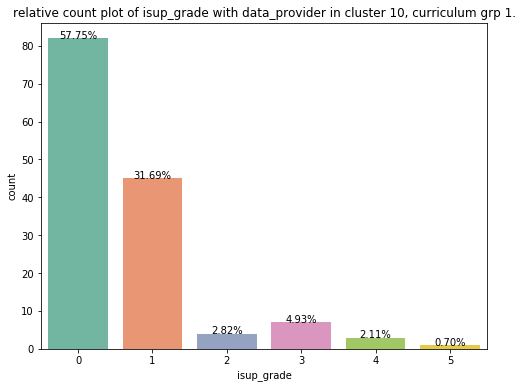

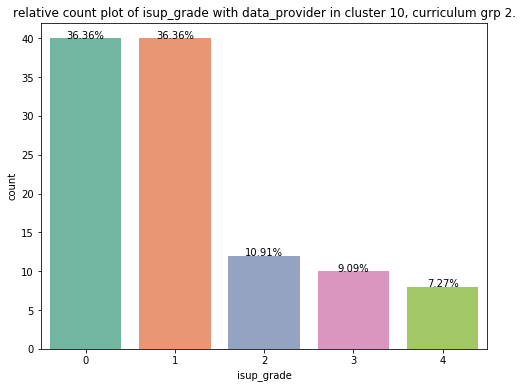

In [5]:
for k_means_grp in range(11):
    for curi_grp in [0,1,2]:
        df_k = df.loc[df["k_means_grp"] == k_means_grp]
        df_k_c = df_k.loc[df_k["curicullum_cluster_grp"] == curi_grp]
#         df_k_c = df_k_c.loc[df_k_c["isup_grade"] != 0]
#         df_k_c = df_k_c.loc[df_k_c["isup_grade"] != 1]
        plot_relative_distribution(df=df_k_c, feature='isup_grade', hue=None, 
                                   title = f'relative count plot of isup_grade with data_provider in cluster {k_means_grp}, curriculum grp {curi_grp}.', 
                                   size=2)

In [6]:
counts = {}
for k_means_grp in range(11):
    counts[k_means_grp] = []
    df_k = df.loc[df["k_means_grp"] == k_means_grp]
    for grade in range(6):
        counts[k_means_grp].append(len(df_k.loc[df["isup_grade"] == grade]))

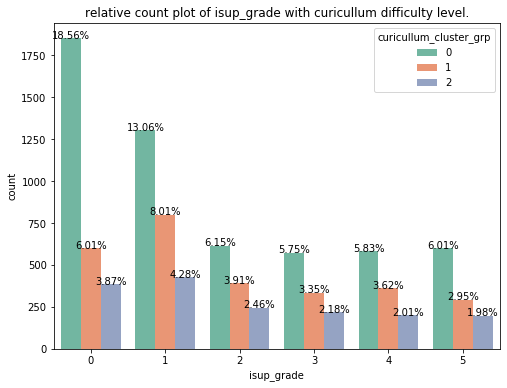

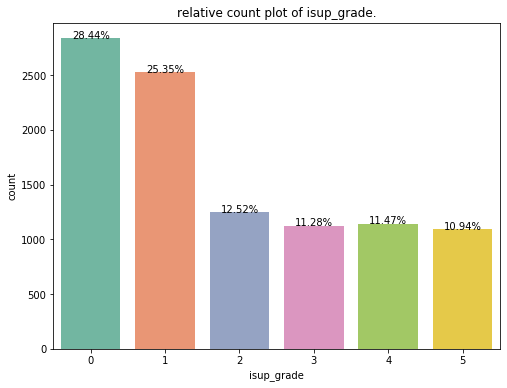

In [7]:
plot_relative_distribution(df=df, feature='isup_grade', hue='curicullum_cluster_grp', 
                                   title = f'relative count plot of isup_grade with curicullum difficulty level.', 
                                   size=2)
plot_relative_distribution(df=df, feature='isup_grade', hue=None, 
                                   title = f'relative count plot of isup_grade.', 
                                   size=2)